## Coding Challenge - Implement Gradient Descent

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load in Pokemon data from Kaggle

In [61]:
data = pd.read_csv('Pokemon.csv')

In [62]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Using Attack to predict HP

In [63]:
data = data[['Attack', 'HP']]
data = data.values

In [64]:
def gradient_descent(init_m, init_b, data, epochs=100):
    m = float(init_m)
    b = float(init_b)
    for _ in range(epochs):
        m, b = compute_gradient(m, b, data)
        error = compute_mse(m, b, data)
        #print('m: {} b: {} loss: {}'.format(round(m, 2), round(b,2), round(error, 2)))
    return m, b
          
def compute_gradient(m, b, data, learning_rate=.0001):
    m_gradient = 0.0
    b_gradient = 0.0
    N = len(data)
    
    for i in range(N):
        x = data[i, 0]
        y = data[i, 1]
        m_gradient += (-x * (y - ((m * x) + b)))
        b_gradient += (- (y - ((m * x) + b)))
        
    m_gradient *= (2/float(N))
    b_gradient *= (2/float(N))
    
    m -= (m_gradient * learning_rate)
    b -= (b_gradient * learning_rate)

    return m, b
        
def compute_mse(m, b, data):
    N = len(data)
    total_loss = 0
    
    for i in range(N):
        x = data[i, 0]
        y = data[i, 1]
        y_pred = ((m * x) + b)
        loss = (y - y_pred) ** 2
        total_loss += loss
        
    return total_loss / N

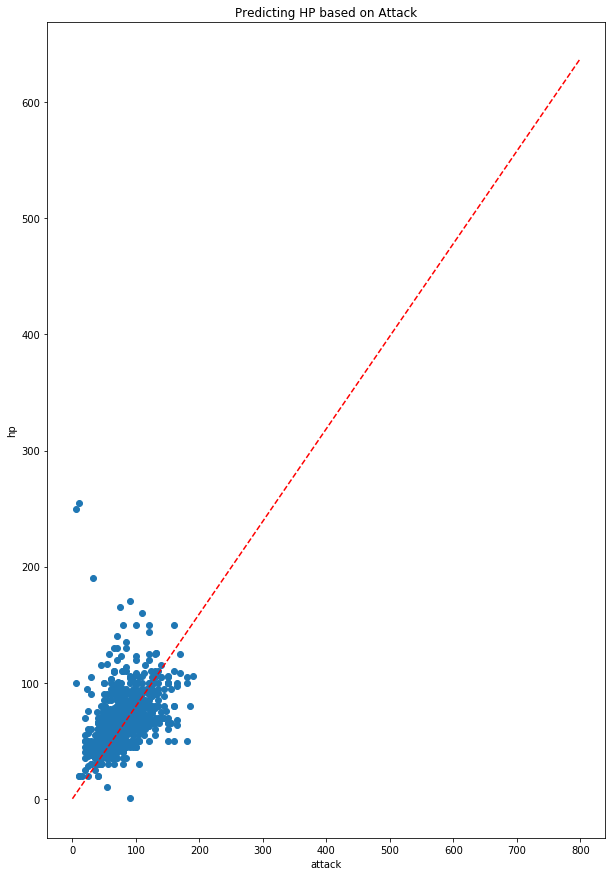

In [73]:
m, b = gradient_descent(0.0, 0.0, data)
x = np.arange(len(data))
y = [((m * i) + b) for i in x]
f, ax = plt.subplots(figsize=(10,15))
ax.plot(x, y, '--', color='r')
ax.scatter(data[:, 0], data[:,1])
ax.set_xlabel('attack')
ax.set_ylabel('hp')
ax.set_title('Predicting HP based on Attack')
plt.show()